In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from ULinearModels import ULogClassification, ULogisticRegression

In [111]:
data = pd.read_csv('train.csv')

In [3]:
data.head()
#Pclass - класс билета(соц. статус): 1-Высокий, 2-Средний, 3-Низкий
#Fare - пассажирский тариф
#SibSp - кол-во братьев и мужей/жен на борту
#Parch - кол-во родителей и детей на борту
#Cabin - номер каюты
#Embarked - порт посадки: C-Cherbourg, Q-Queenstown, S-Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

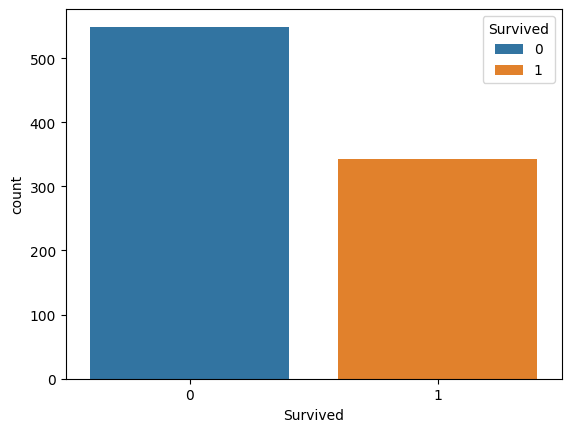

In [4]:
#Классы достаточно сбалансированы
sns.countplot(data=data, x='Survived', hue='Survived')

In [5]:
#Sex - 0-male, 1-female
#Embarked - порт посадки: 0(C)-Cherbourg, 1(Q)-Queenstown, 2(S)-Southampton
corr_data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
corr_data['Sex'] = corr_data['Sex'].map({'male': 0, 'female': 1})
corr_data['Embarked'] = corr_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

<Axes: >

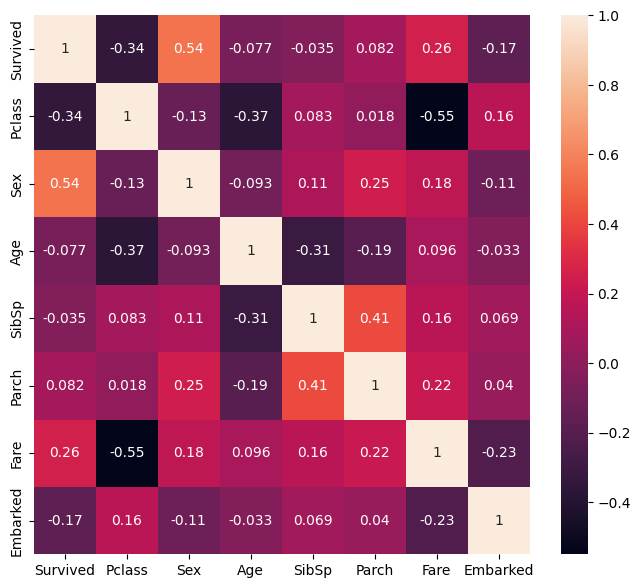

In [6]:
plt.figure(figsize=(8,7), dpi=100)
sns.heatmap(corr_data.corr(), annot=True)

<Axes: xlabel='Fare', ylabel='Age'>

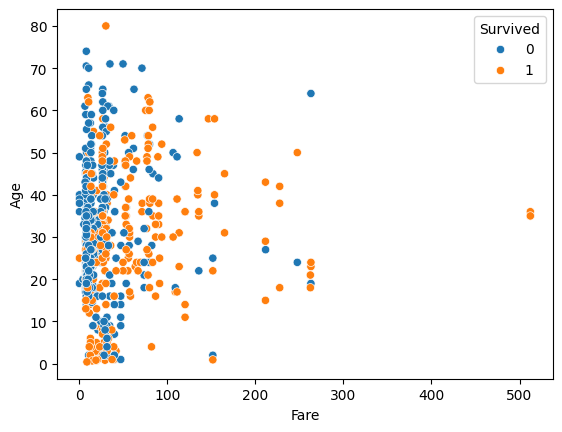

In [7]:
sns.scatterplot(data=data, x='Fare', y='Age', hue='Survived')

In [95]:
lin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [112]:
lin_data = data.drop(['Name', 'Age', 'Cabin', 'Ticket'], axis=1)

In [113]:
lin_data.loc[61, 'Embarked'], lin_data.loc[829, 'Embarked'] = 'C', 'C'

In [114]:
dummy_data = pd.get_dummies(lin_data)

In [115]:
dummy_data = dummy_data.set_index('PassengerId')

In [116]:
X = dummy_data.drop('Survived', axis=1)
y = dummy_data['Survived']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [118]:
scaler = StandardScaler()

In [119]:
scaler.fit(X_train)

StandardScaler()

In [120]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Логистическая регрессия

In [129]:
model = LogisticRegression()

In [130]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Линейная регрессия

In [121]:
model = ULogisticRegression(0, gradient_type='default', max_iter=10000)

In [122]:
model.fit(X_train, y_train)

In [131]:
y_predict = model.predict(X_test)

In [124]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.81      0.69      0.74        80

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [132]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.84      0.68      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



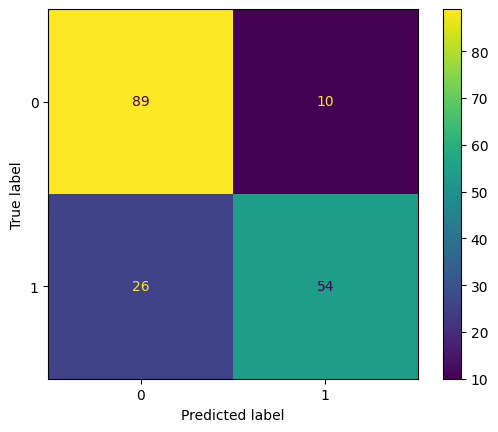

In [133]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [125]:
coeff = pd.DataFrame(data={'Coeff': model.weights_[1:], 'Feature': X.columns})

In [126]:
coeff = coeff.sort_values('Coeff')

<Axes: xlabel='Feature', ylabel='Coeff'>

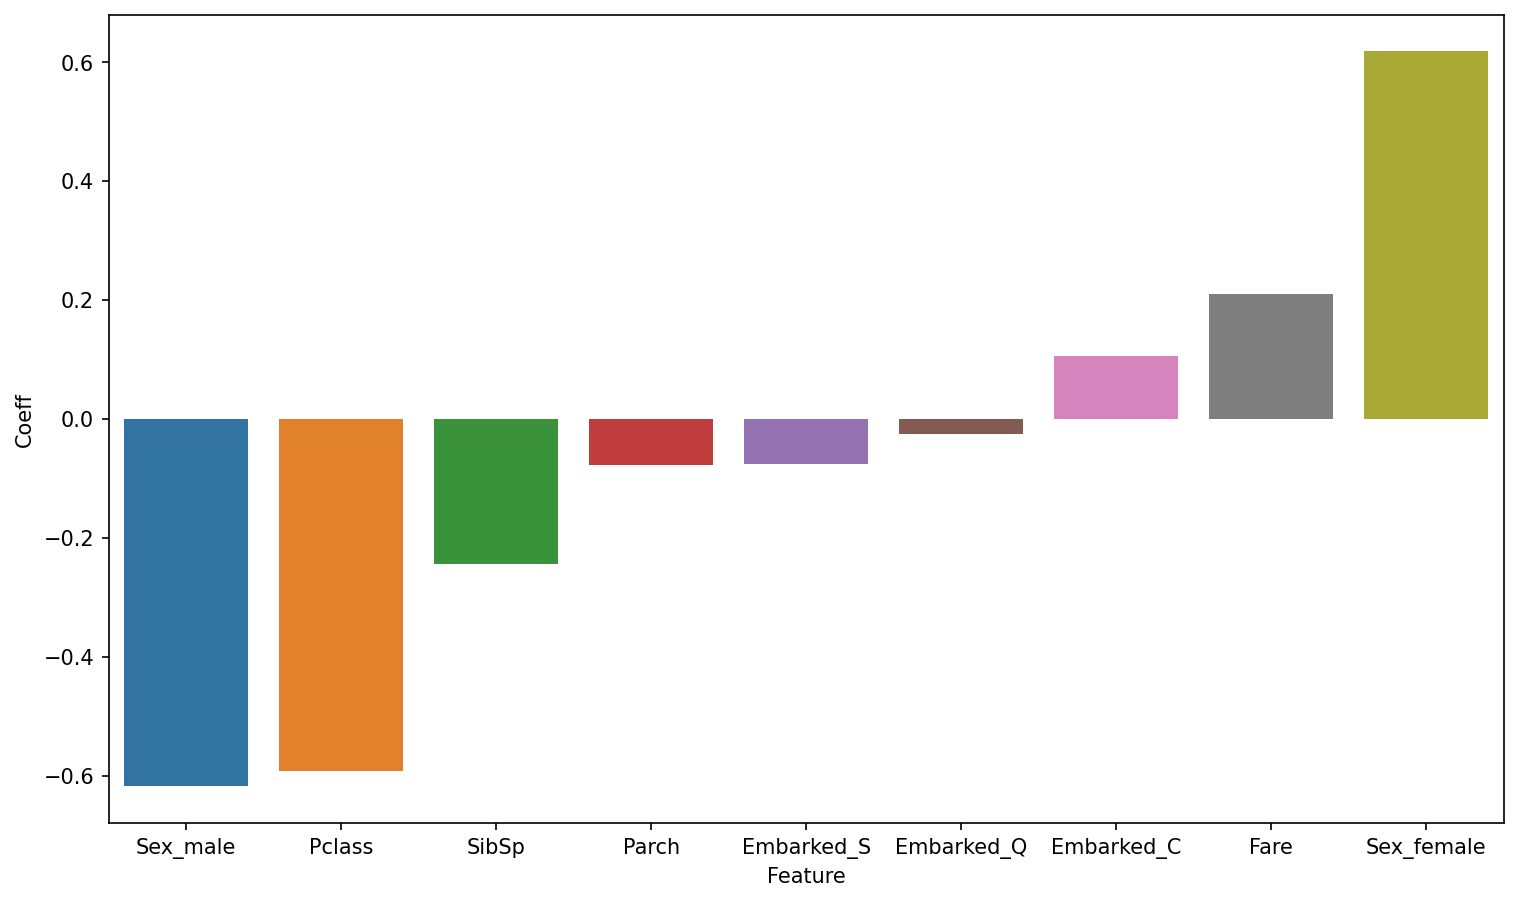

In [127]:
plt.figure(figsize=(12,7), dpi=150)
sns.barplot(data=coeff, x='Feature', y='Coeff', hue='Feature')

In [135]:
model.coef_

array([[-0.6744219 , -0.24910332, -0.05740818,  0.12753489,  0.62916513,
        -0.62916513,  0.10188963, -0.01592936, -0.07963885]])